In [1]:
import pandas as pd
import pylab as plt
import numpy as np
from collections import defaultdict, Counter

In [2]:
breastcancer = pd.read_csv('BreastCancerWisconsin.csv')

In [3]:
breastcancer.head(n=30)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
breastcancer['A7'].replace('?', np.NaN)

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: A7, Length: 699, dtype: object

In [8]:
breastcancer.head(n=30)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
breastcancer.replace('?',np.NaN)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
breastcancernan = breastcancer.replace('?',np.NaN)

In [15]:
breastcancernan.head(n=30)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [16]:
#Check for NaN values on Column A7
breastcancernan[breastcancernan['A7'].isnull()]

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [19]:
# if want to know the total NaN values
breastcancernan.isna().sum().sum()

16

In [18]:
breastcancernan["A7"] = pd.to_numeric(breastcancernan["A7"])

In [20]:
breastcancernan.head(n=30)

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [21]:
# if want to know the total NaN values
breastcancernan.isna().sum().sum()

16

In [22]:
breastcancernan.fillna(breastcancernan.mean())

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1.000000,3,1,1,2
1,1002945,5,4,4,5,7,10.000000,3,2,1,2
2,1015425,3,1,1,1,2,2.000000,3,1,1,2
3,1016277,6,8,8,1,3,4.000000,3,7,1,2
4,1017023,4,1,1,3,2,1.000000,3,1,1,2
5,1017122,8,10,10,8,7,10.000000,9,7,1,4
6,1018099,1,1,1,1,2,10.000000,3,1,1,2
7,1018561,2,1,2,1,2,1.000000,3,1,1,2
8,1033078,2,1,1,1,2,1.000000,1,1,5,2
9,1033078,4,2,1,1,2,1.000000,2,1,1,2


In [23]:
breastcancernan.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [25]:
breastcancernan.shape

(699, 11)

In [27]:
breastcancernan.Scn.unique()

array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
        1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
        1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
        1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
        1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
        1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
        1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
        1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
        1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
        1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
        1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
        1148873,  1152331,  1155546,  1156272,  1156948,  1157

In [28]:
breastcancernan['Scn'].nunique()

645

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC312D3320>]],
      dtype=object)

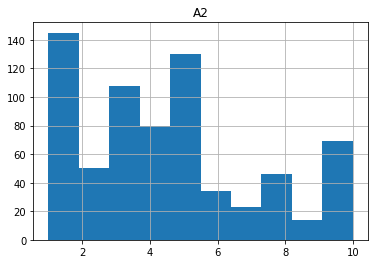

In [30]:
breastcancernan.hist(column='A2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC3171E4A8>]],
      dtype=object)

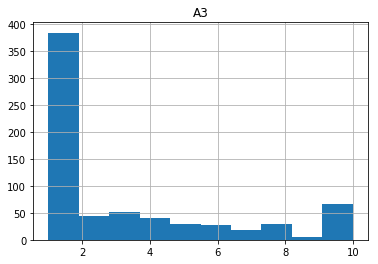

In [31]:
#Historgram of A3
breastcancernan.hist(column='A3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC31788860>]],
      dtype=object)

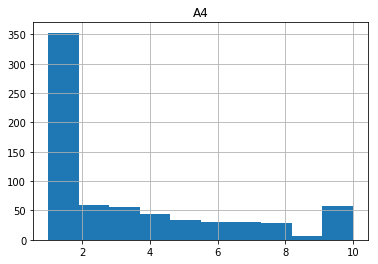

In [32]:
#Historgram of A4
breastcancernan.hist(column='A4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC317F3DA0>]],
      dtype=object)

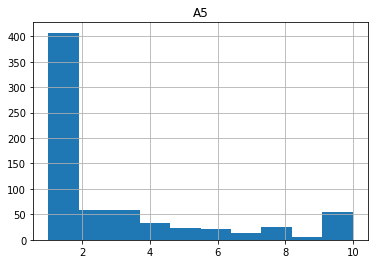

In [33]:
#Historgram of A5
breastcancernan.hist(column='A5')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC317FDBA8>]],
      dtype=object)

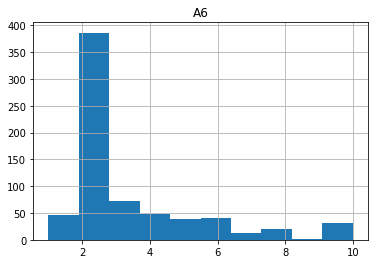

In [34]:
#Historgram of A6
breastcancernan.hist(column='A6')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC318F7518>]],
      dtype=object)

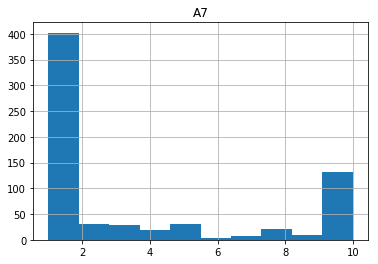

In [35]:
#Historgram of A7
breastcancernan.hist(column='A7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC3179AD30>]],
      dtype=object)

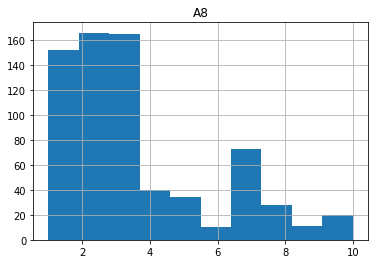

In [36]:
#Historgram of A8
breastcancernan.hist(column='A8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC31A04E10>]],
      dtype=object)

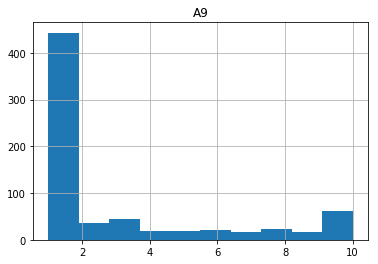

In [37]:
#Historgram of A9
breastcancernan.hist(column='A9')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC32A12CC0>]],
      dtype=object)

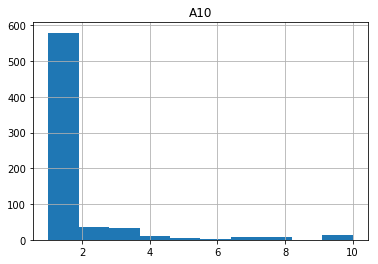

In [38]:
#Historgram of A10
breastcancernan.hist(column='A10')

In [39]:
#List column names
list(breastcancernan.columns.values)

['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']

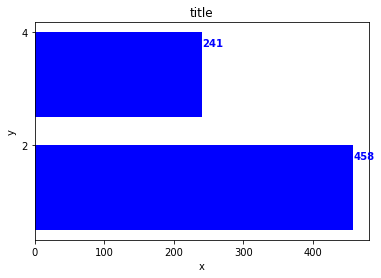

In [42]:
#Plot a Bar Plot of CLASS
import matplotlib.pyplot as plt

a = breastcancernan.CLASS.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

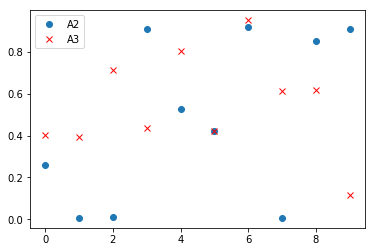

In [46]:
d = {'A2' : np.random.rand(10),
     'A3' : np.random.rand(10)}

breastcancernan = pd.DataFrame(d)

breastcancernan.plot(style=['o','rx'])

In [ ]:
Observations:
    
    -Columns A2 through A10 should be renamed according to what data they are referencing, e.g., instrument readings, levels, etc.
    -All numeric data should be standardized without a decimal place.